# Project Lab 3: Neural Networks for Handwritten Digit Recognition, Binary

In this lab, you will use a neural network to recognize the hand-written digits zero and one.

## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This lab will be using the Keras interface. 

## 2 - Neural Networks

You implemented logistic regression. This was extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.

### Problem Statement

In this section, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

### Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

<mark>Write code </mark>  for `load_data()` function.

In [ ]:
def load_data():

    ### START CODE HERE ###


    ### END CODE HERE ###

    return X, y

# load dataset
X, y = load_data()

In [2]:
def load_data():
    """
    Load dataset from .npy files.

    Returns:
    X (ndarray): Matrix containing the features (inputs).
    y (ndarray): Vector containing the labels (outputs).
    """
   
    X = np.load('data/X.npy')
    y = np.load('data/y.npy')
    
           
    return X, y

# Load dataset
X, y = load_data()

### View the variables

Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.


<mark>Write code </mark> that prints 

- first element of X
- first element of y
- last element of y

In [7]:
### START CODE HERE ###


### END CODE HERE ###

In [3]:
### START CODE HERE ###
print("First element of X:")
print(X[0])

print("First element of y:")
print(y[0])

print("Last element of y:")
print(y[-1])
### END CODE HERE ###

First element of X:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0

<details>
  <summary><font size="3"><b>
  Expected Output (Click to Expand) 
  </b></font></summary>
   
```

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  8.56059680e-06
  1.94035948e-06 -7.37438725e-04 -8.13403799e-03 -1.86104473e-02
 -1.87412865e-02 -1.87572508e-02 -1.90963542e-02 -1.64039011e-02
 -3.78191381e-03  3.30347316e-04  1.27655229e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.16421569e-04  1.20052179e-04
 -1.40444581e-02 -2.84542484e-02  8.03826593e-02  2.66540339e-01
  2.73853746e-01  2.78729541e-01  2.74293607e-01  2.24676403e-01
  2.77562977e-02 -7.06315478e-03  2.34715414e-04  0.00000000e+00
...
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
The first element of y is:  0
The last element of y is:  1

```
</details>

### Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. 

<mark>Write code </mark> that prints the shape of `X` and `y` and see how many training examples you have in your dataset.

In [ ]:
### START CODE HERE ###


### END CODE HERE ###

In [4]:
### START CODE HERE ###
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
### END CODE HERE ###


Shape of X: (5000, 400)
Shape of y: (5000, 1)


**Expected Output**
```
The shape of X is: (1000, 400)
The shape of y is: (1000, 1)
```

### Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

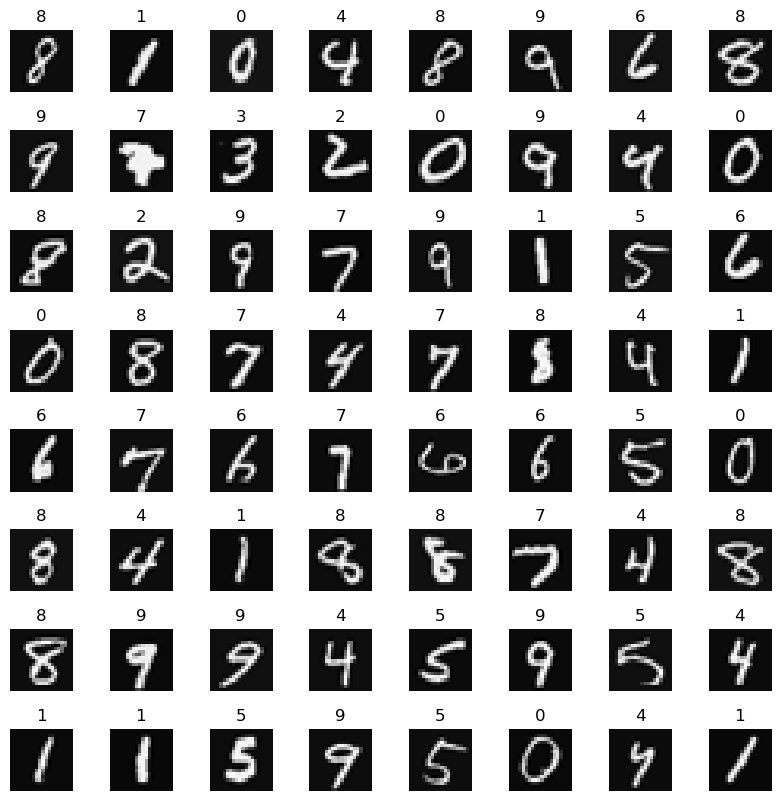

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

### Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/neural-netwoeks-01.png" width="744" height="368">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - The dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - The shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

### Tensorflow Model Implementation

Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. 

You specify a layer's *output dimensions* and this determines the next layer's input dimension. 

The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement. 

>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. 

For example:  

`tf.keras.Input(shape=(400,)),    #specify input shape`  

We will include that here to illuminate some model sizing.

<mark>Complete the code </mark> below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    # specify input size
        
        ### START CODE HERE ###
        Dense(25, activation='relu'),    # first hidden layer with 25 units and ReLU activation
        Dense(15, activation='relu'),    # second hidden layer with 15 units and ReLU activation
        Dense(1, activation='sigmoid')   # output layer with 1 unit and sigmoid activation
        ### END CODE HERE ### 
        
    ], name="mymodel" 
)



In [7]:
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><font size="3" color="white"><b>Expected Output (Click to Expand) </b></font></summary>
The `model.summary()` function displays a useful summary of the model. Because we have specified an input layer size, the shape of the weight and bias arrays are determined and the total number of parameters per layer can be shown. Note, the names of the layers may vary as they are auto-generated.  
    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 25)                10025     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
=================================================================
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________
```

</details>

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [11]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


We can examine details of the model by first extracting the layers with `model.layers` and then extracting the weights with `layerx.get_weights()` as shown below.

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 1), b3 shape = (1,)
```

`xx.get_weights` returns a NumPy array. You can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [14]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.3291579 ],
       [ 0.09584117],
       [ 0.27393955],
       [ 0.1693734 ],
       [-0.20013142],
       [ 0.32600248],
       [-0.0934301 ],
       [-0.07342505],
       [-0.06964201],
       [-0.44042084],
       [-0.12177125],
       [ 0.00359529],
       [ 0.15702653],
       [-0.30015317],
       [ 0.33909893]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


<mark>Write code </mark> that will define a loss function and run gradient descent to fit the weights of the model to the training data.

- Use binary classification loss function
- Use `Adam` optimizer with parameter 0.001

In [ ]:
### START CODE HERE ###


### END CODE HERE ###

In [15]:
### START CODE HERE ###
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              )

# Fit the model to the training data
history = model.fit(X, y, epochs=20, batch_size=157)
### END CODE HERE ###


Epoch 1/20
32/32 [==============================] - 1s 937us/step - loss: -0.2263
Epoch 2/20
32/32 [==============================] - 0s 922us/step - loss: -1.2632
Epoch 3/20
32/32 [==============================] - 0s 791us/step - loss: -2.5570
Epoch 4/20
32/32 [==============================] - 0s 855us/step - loss: -4.2468
Epoch 5/20
32/32 [==============================] - 0s 872us/step - loss: -6.3526
Epoch 6/20
32/32 [==============================] - 0s 857us/step - loss: -8.6591
Epoch 7/20
32/32 [==============================] - 0s 874us/step - loss: -11.1559
Epoch 8/20
32/32 [==============================] - 0s 823us/step - loss: -13.8637
Epoch 9/20
32/32 [==============================] - 0s 969us/step - loss: -16.8825
Epoch 10/20
32/32 [==============================] - 0s 856us/step - loss: -20.1991
Epoch 11/20
32/32 [==============================] - 0s 809us/step - loss: -23.8885
Epoch 12/20
32/32 [==============================] - 0s 905us/step - loss: -27.9284
Epoch 1

<details>
  <summary><font size="3" color="white"><b>
  Expected Output (Click to Expand) 
  </b></font></summary>
   
```
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6755
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.5148
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.3667
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.2484 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.1765
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.1312
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.1047 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.0847 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.0815
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.0621
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0538
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.0451
Epoch 13/20
...
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.0299
Epoch 20/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.0205

```
</details>

### Prediction 
To run the model on an example to make a prediction, we can use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). 

Note : The input to `predict` is an array so the single example must be reshaped to two dimensional.

- <mark>Write code </mark> that predicts for X[0]

In [ ]:
### START CODE HERE ###



### END CODE HERE ###

print(f" predicting : {prediction_for_X0}")

In [16]:
X0_reshaped = X[0].reshape(1, -1)
prediction_for_X0 = model.predict(X0_reshaped)
print(f"Predicting: {prediction_for_X0}")

1/1 [==============================] - 0s 76ms/step
Predicting: [[1.]]


**Expected Output**
```
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
 predicting a zero: [[0.0134697]]
```

- <mark>Write code </mark> that predicts for X[500]

In [17]:
### START CODE HERE ###
# Reshape X[500] to be 2-dimensional
X500_reshaped = X[500].reshape(1, -1)

# Make a prediction
prediction_for_X500 = model.predict(X500_reshaped)
### END CODE HERE ###

print(f"Predicting: {prediction_for_X500}")


1/1 [==============================] - 0s 17ms/step
Predicting: [[0.9999999]]


**Expected Output**
```
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 predicting a one:  [[0.97848195]]
```

### Final Prediction

The output of the model is interpreted as a probability. 

In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 

In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.

As in the case of logistic regression, the probability is compared to a threshold to make a **final prediction**.

<mark>Write code </mark>  for final prediction for for X[0]  and for X[500]

> Note: threshold is 0.5

In [ ]:
### START CODE HERE ###


### END CODE HERE ###

In [18]:
### START CODE HERE ###
# Reshape X[0] and X[500] to be 2-dimensional
X0_reshaped = X[0].reshape(1, -1)
X500_reshaped = X[500].reshape(1, -1)

# Make predictions
prediction_for_X0 = model.predict(X0_reshaped)
prediction_for_X500 = model.predict(X500_reshaped)

# Apply threshold to get final predictions
final_prediction_X0 = (prediction_for_X0 >= 0.5).astype(int)
final_prediction_X500 = (prediction_for_X500 >= 0.5).astype(int)
### END CODE HERE ###

print(f"Final prediction for X[0]: {final_prediction_X0}")
print(f"Final prediction for X[500]: {final_prediction_X500}")


1/1 [==============================] - 0s 14ms/step
Final prediction for X[0]: [[1]]
Final prediction for X[500]: [[1]]


**Expected Output**
```
final prediction for X[0] after threshold: 1
final prediction for X[500] after threshold: 0
```

Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 14ms/step


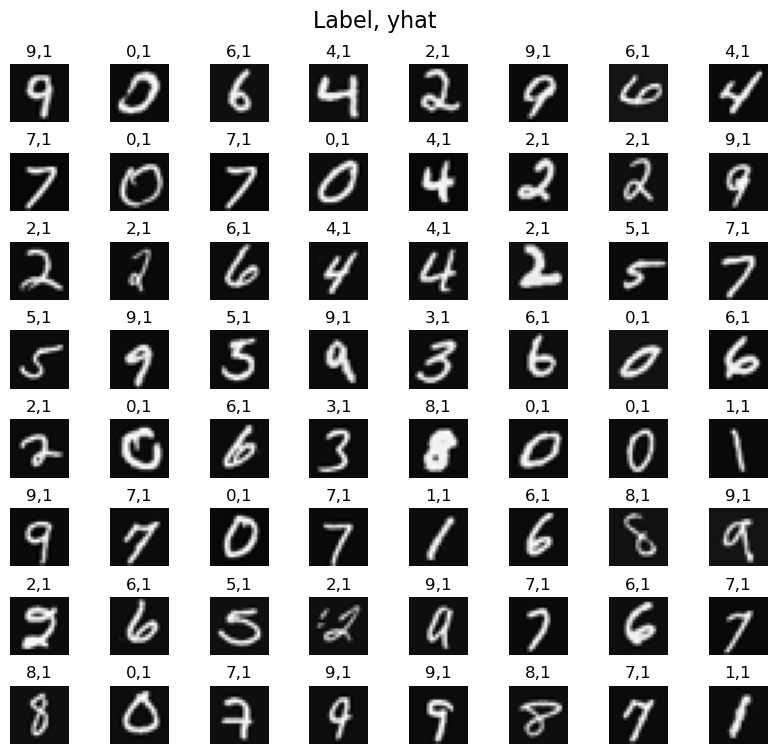

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

**Congratulations!**
You have successfully built and utilized a neural network.